In [2]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


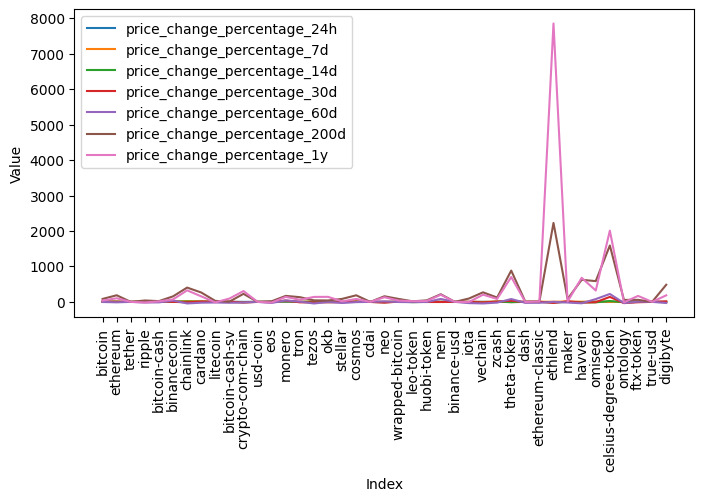

In [5]:
# Plot your data to see what's in your DataFrame
plt.figure(figsize=(8, 4))
for column in df_market_data.columns:
    plt.plot(df_market_data.index, df_market_data[column], label=column)

plt.xticks(rotation=90)
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled=StandardScaler().fit_transform(df_market_data)
df_market_data_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [7]:
# Create a DataFrame with the scaled data
df_market_data_scaled_df=pd.DataFrame(df_market_data_scaled,columns=df_market_data.columns)

# Copy the crypto names from the original data
df_market_data_scaled_df["coinid"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled_df.set_index("coinid", inplace=True)

# Display sample data
df_market_data_scaled_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,12))

In [9]:
# Create an empty list to store the inertia values
inertia1=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
  k_model=KMeans(n_clusters=i,random_state=1)
  k_model.fit(df_market_data_scaled)
  inertia1.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve1 = {'k': k, 'inertia': inertia1}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve1_df = pd.DataFrame(elbow_curve1)
elbow_curve1_df.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


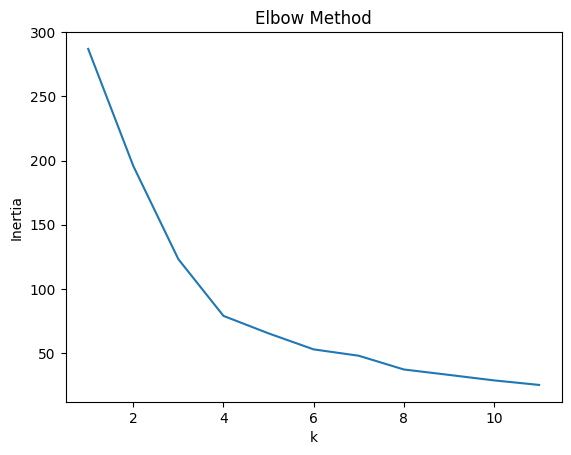

In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(k, inertia1)  # Plot k on the x-axis and inertia1 on the y-axis
plt.xlabel('k')  # Label for the x-axis
plt.ylabel('Inertia')  # Label for the y-axis
plt.title('Elbow Method')  # Title for the plot
plt.show()  # Display the plot

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:**the best value for k is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
k_model= KMeans(n_clusters=4,random_state=1)

In [13]:
# Fit the K-Means model using the scaled data
k_model.fit(df_market_data_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
pred_cluster=k_model.predict(df_market_data_scaled_df)

# Print the resulting array of cluster values.
pred_cluster

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1],
      dtype=int32)

In [15]:
# Create a copy of the DataFrame
df_market_data_scaled_df_copy=df_market_data_scaled_df.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_df_copy["predicted_cluster"]=pred_cluster

# Display sample data
df_market_data_scaled_df_copy.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coinid,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


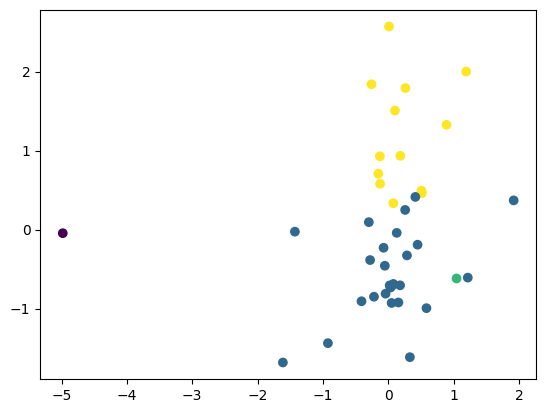

In [17]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

plt.scatter(df_market_data_scaled_df_copy['price_change_percentage_24h'], df_market_data_scaled_df_copy['price_change_percentage_7d'], c=df_market_data_scaled_df_copy['predicted_cluster'])

plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
market_pca=pca.fit_transform(df_market_data_scaled_df)
# View the first five rows of the DataFrame.
market_pca_df = pd.DataFrame(market_pca, columns=['PC1', 'PC2', 'PC3'])
market_pca_df.head(5)

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [20]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [21]:
#calculate the Total Explained Variance by summing all 3 Explained Variance Ratios
sum(pca.explained_variance_ratio_)

0.895031657030984

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**0.895031657030984

In [22]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
market_pca_df["coinid"] = df_market_data_scaled_df.index

# Set the coinid column as index
market_pca_df.set_index("coinid", inplace=True)

# Display sample data
market_pca_df.head(5)



,PC1,PC2,PC3
coinid,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,12))

In [24]:
# Create an empty list to store the inertia values
inertia2=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  k_model=KMeans(n_clusters=i,random_state=1)
  k_model.fit(market_pca_df)
  inertia2.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve2 = {'k': k, 'inertia': inertia2}
# Create a DataFrame with the data to plot the Elbow curve
elbow_curve2_df = pd.DataFrame(elbow_curve2)
elbow_curve2_df.head()


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251


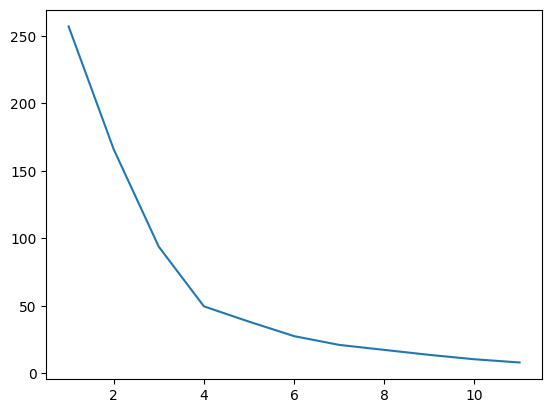

In [26]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(k,inertia2)
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**the best value for k is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**its same, k=4 in both

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, random_state=1)

In [28]:
# Fit the K-Means model using the PCA data
model_pca.fit(market_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [29]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pred_cluster_pca=model_pca.predict(market_pca_df)
# Print the resulting array of cluster values.
pred_cluster_pca


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [30]:
# Create a copy of the DataFrame with the PCA data
market_pca_df_copy=market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_pca_df_copy["predicted_cluster_pca"]=pred_cluster_pca

# Display sample data
market_pca_df_copy.head(5)

,PC1,PC2,PC3,predicted_cluster_pca
coinid,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


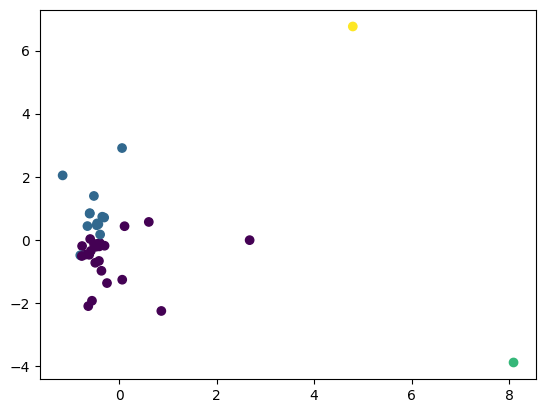

In [31]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plt.scatter(market_pca_df_copy["PC1"],market_pca_df_copy["PC2"],c=market_pca_df_copy["predicted_cluster_pca"])
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

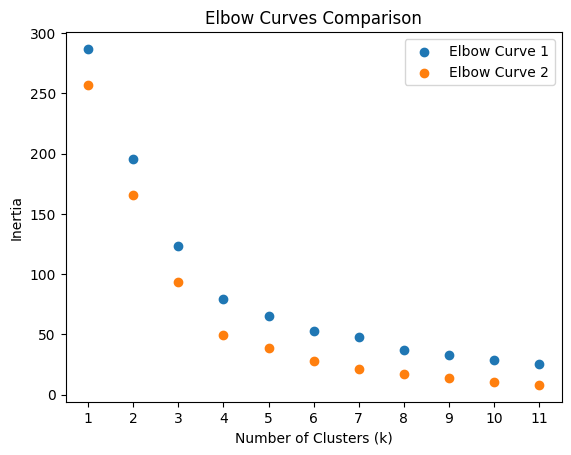

In [32]:
# Composite plot to contrast the Elbow curves
# Create a scatter plot for Elbow Curve 1
plt.scatter(elbow_curve1_df["k"], elbow_curve1_df["inertia"], label="Elbow Curve 1")

# Create a scatter plot for Elbow Curve 2
plt.scatter(elbow_curve2_df["k"], elbow_curve2_df["inertia"], label="Elbow Curve 2")

# Set labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curves Comparison")
plt.xticks(k)

# Add legend
plt.legend()

# Show the plot
plt.show()

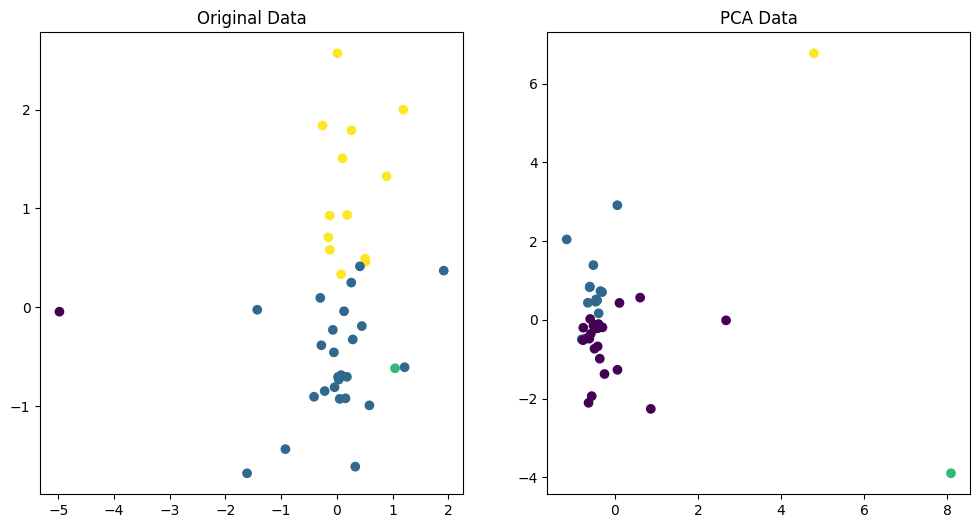

In [33]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_market_data_scaled_df_copy
axs[0].scatter(df_market_data_scaled_df_copy['price_change_percentage_24h'],
               df_market_data_scaled_df_copy['price_change_percentage_7d'],
               c=df_market_data_scaled_df_copy['predicted_cluster'])
axs[0].set_title('Original Data')

# Scatter plot for market_pca_df_copy
axs[1].scatter(market_pca_df_copy["PC1"],
               market_pca_df_copy["PC2"],
               c=market_pca_df_copy["predicted_cluster_pca"])
axs[1].set_title('PCA Data')

# Show the plot
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**PCA has tigher clusters within 0 and 1 clusters as compared to orignal data